#Image Classification Fastai V1



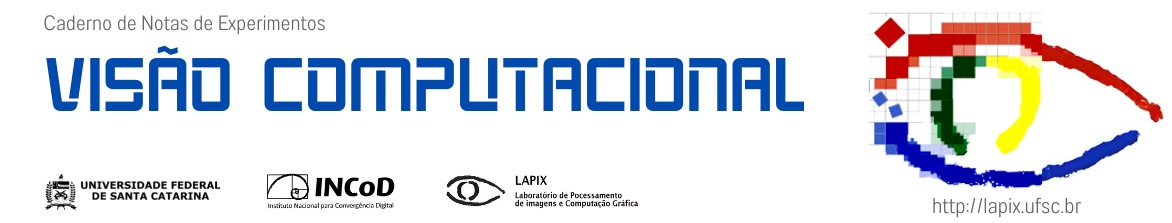

# Autores:


* Aldo Von Wangenheim: aldo.vw@ufsc.br
* Thiago Zimmermann Loureiro Chaves: thiago.zlc@grad.ufsc.br





# Para utilizar a placa de vídeo no Google Colab...

1) clique no ▾ do lado de "Conectar"

2) Ver recursos

3) Alterar o tipo de ambiente de execução

4) Acelerador de hardware: GPU

5) Execute a célula abaixo. Ela deve retornar as informações da placa de vídeo.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
!/opt/bin/nvidia-smi
!nvcc --version

Wed Apr 19 05:02:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Instalando Fastai e Pytorch

In [ ]:
!pip install fastai==1.0.61
!pip install "torch==1.7.1" "torchvision==0.8.2"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.1/353.1 kB 22.1 MB/s eta 0:00:00
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19188 sha256=1af3c83dabdb41ae0399c273597b476c4d284634ba5d5a47a93265c62f2eb152
  Stored in directory: /root/.cache/pip/wheels/f6/d8/b0/15cfd7805d39250ac29318105f09b1750683387630d68423e1
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.12
    Uninstalling fastai-2.7.12:
      Successfully uninstalled fastai-2.7.12
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.8/776.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 M

In [ ]:
!pip install wandb -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.7 MB/s eta 0:00:00


In [ ]:
# Log in to your W&B account
!wandb login
import wandb

!wandb enabled

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
W&B enabled.


#Monta seu Drive no Notebook

In [ ]:
import os

# Codigo para montar o Google Drive
from google.colab import drive
#drive.mount('/content/gdrive')
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


#Import de Bibliotecas Necessárias

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import SaveModelCallback
from fastai.utils import *
from wandb.fastai import WandbCallback

# Importações para Utilitários Diversos
from shutil import copyfile
import matplotlib.pyplot as plt
import operator
from PIL import Image


#Batch Size, Tamanho das Imagens e o Path (O diretório do programa)

In [ ]:
!ls "/content/gdrive/Shareddrives/MindFunga/SplittedProtax28_03"

config.yml  Esporos1000x  Himenio1000x	Poros100x  Poros35x


In [ ]:
# Inicializações de Variáveis Globais
bs = 8
size = 896
path = Path("/content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros100x")
path

PosixPath('/content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros100x')

In [ ]:
path = Path("/content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros100x"); path

PosixPath('/content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros100x')

#OPCIONAL: Verificar Integridade das Imagens

In [ ]:
import os
from PIL import Image

# Percorre o conjunto *train* e lista todas as imagens com problemas de formato
# ou de integridade de dados
for root, dirs, files in os.walk(path.joinpath('/content/gdrive/MyDrive/MIND.Funga APP/Atualização Agosto 2022/5.1 - RECURADO'), topdown=False):
    print(root)
    for file in files:
        try:
          im = Image.open(root+'/'+file)
          im.verify() # Verify image file integrity. Closes image after running.
          im = Image.open(root+'/'+file)
          im.load()
          im.transpose(Image.FLIP_LEFT_RIGHT)
          im.close()
        except IOError as e:
          print(os.path.join(root, file))
          print ('Bad image: %s' % e)

# Transforms


In [ ]:
tfms = get_transforms()

#data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=448, valid_pct = 0.2, bs=bs) # Transforma as imagens no tamanho padrão e separa 20 % das fotos para validação
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=896,bs=bs,train="train",valid="val",test="/content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros100x/test") # Utiliza 3 diretórios separados Train Val e Test
data

ImageDataBunch;

Train: LabelList (62 items)
x: ImageList
Image (3, 896, 896),Image (3, 896, 896),Image (3, 896, 896),Image (3, 896, 896),Image (3, 896, 896)
y: CategoryList
Fulvifomes squamosus,Fulvifomes squamosus,Fulvifomes squamosus,Fulvifomes squamosus,Fulvifomes squamosus
Path: /content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros100x;

Valid: LabelList (20 items)
x: ImageList
Image (3, 896, 896),Image (3, 896, 896),Image (3, 896, 896),Image (3, 896, 896),Image (3, 896, 896)
y: CategoryList
Fulvifomes squamosus,Fulvifomes squamosus,Fulvifomes squamosus,Fulvifomes squamosus,Fulvifomes squamosus
Path: /content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros100x;

Test: LabelList (8 items)
x: ImageList
Image (3, 896, 896),Image (3, 896, 896),Image (3, 896, 896),Image (3, 896, 896),Image (3, 896, 896)
y: EmptyLabelList
,,,,
Path: /content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros100x

In [ ]:
imageList = ImageList.from_folder(path.joinpath("/content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Esporos1000x")); imageList

ImageList (92 items)
Image (3, 1536, 2048),Image (3, 1536, 2048),Image (3, 1536, 2048),Image (3, 1536, 2048),Image (3, 1536, 2048)
Path: /content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Esporos1000x

In [ ]:
fnames = get_image_files(path, recurse=True)
fnames[:10]

[PosixPath('/content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros35x/train/Phylloporia clariceae/PRO070_Phylloporia cf clariceae_POROS35X001.jpg'),
 PosixPath('/content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros35x/train/Phylloporia clariceae/PRO062_Phylloporia cf clariceae_POROS35X002.jpg'),
 PosixPath('/content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros35x/train/Phylloporia clariceae/PRO062_Phylloporia cf clariceae_POROS35X009.jpg'),
 PosixPath('/content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros35x/train/Phylloporia clariceae/PRO062_Phylloporia cf clariceae_POROS35X004.jpg'),
 PosixPath('/content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros35x/train/Phylloporia clariceae/PRO071_Phylloporia cf clariceae_POROS35X003.jpg'),
 PosixPath('/content/gdrive/Shareddrives/MindFunga/SplittedProtax28-03/Poros35x/train/Phylloporia clariceae/PRO070_Phylloporia cf clariceae_POROS35X012.jpg'),
 PosixPath('/content/gdrive/Shareddrives/MindF

#Mostra um Batch de imagens

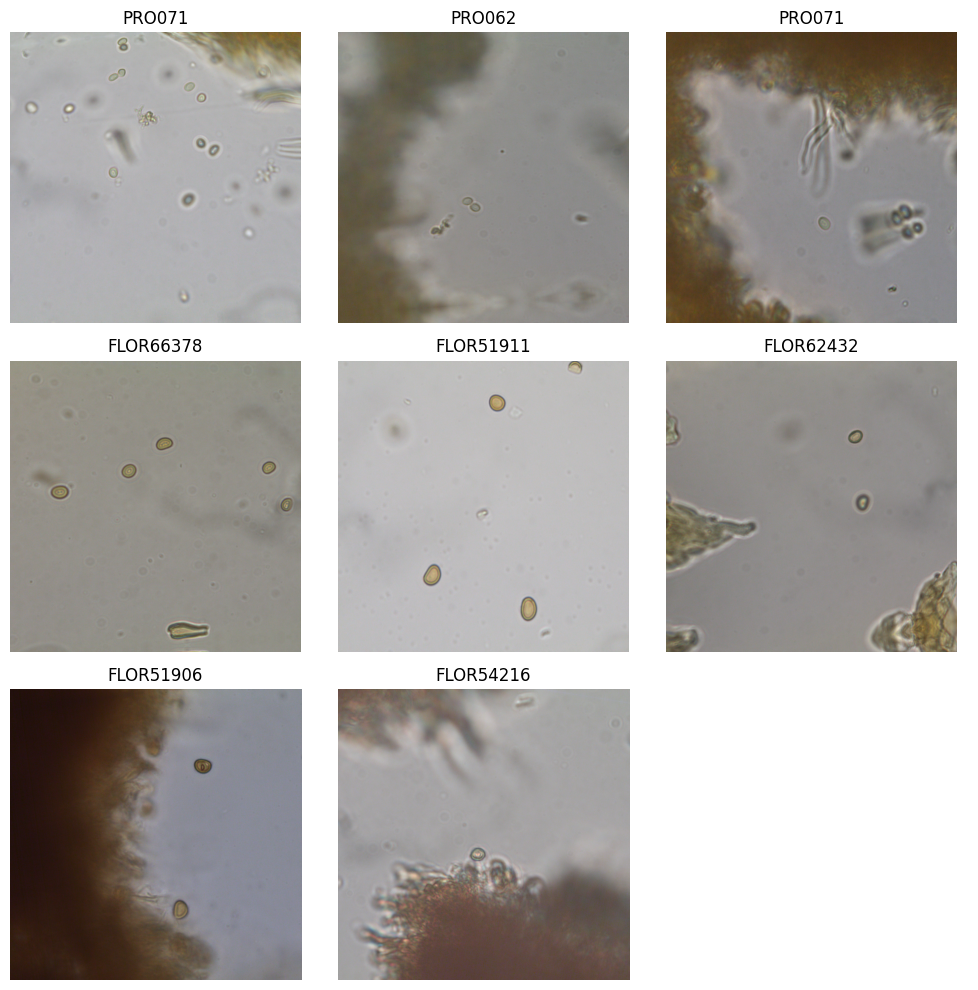

In [ ]:
data.show_batch(rows=4, figsize=(10,10))

In [ ]:
print(data.classes)
len(data.classes),data.c

['Fulvifomes squamosus', 'Phellinotus piptadeniae', 'Phylloporia clariceae']


(3, 3)


#Selecionamos a Rede Neural


*   resnet18, resnet34, resnet50, resnet101, resnet152
*   squeezenet1_0, squeezenet1_1
*   densenet121, densenet169, densenet201, densenet161
*   vgg16_bn, vgg19_bn
*   alexnet

Obs: Temos que alterar o import e o used model

# Resnet50

ResNet is a model proposed in 2015 by researchers at Microsoft Research which introduced a new architecture called Residual Network.

In order to solve the problem of the vanishing/exploding gradient, this architecture introduced the concept called Residual Blocks. In this network, we use a technique called skip connections. The skip connection connects activations of a  layer to further layers by skipping some layers in between. This forms a residual block. Resnets are made by stacking these residual blocks together.
The approach behind this network is instead of layers learning the underlying mapping, we allow the network to fit the residual mapping

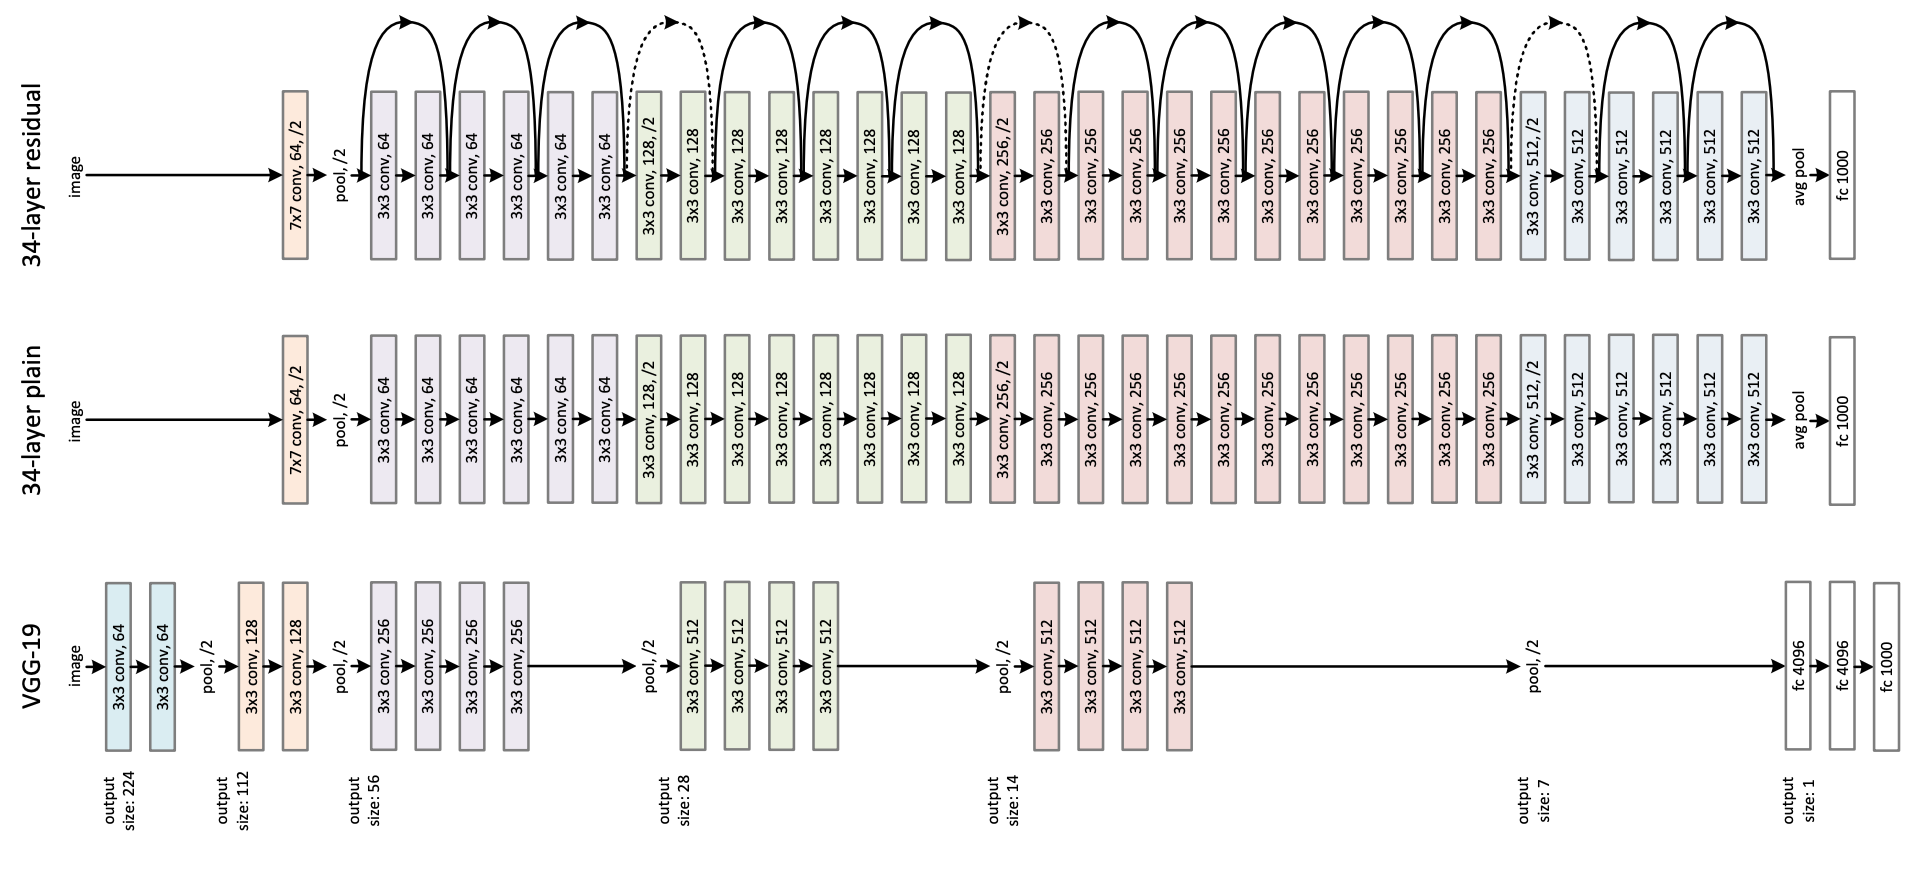



In [ ]:
# learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

#Path do Learner

In [ ]:
learn.path = Path("/content/gdrive/Shareddrives/MindFunga/Redes")

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Primeiro Treinamento
- 15 ciclos
- Salvando todos os ciclos para poder retomar onde parou

In [ ]:
wandb.init(project="Tcc_Esporos1000x_Abril_3classes")

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy,callback_fns=partial(WandbCallback, input_type='images'))

Better model found at epoch 0 with valid_loss value: 1.566413164138794.
Better model found at epoch 0 with valid_loss value: 1.566413164138794.
Better model found at epoch 1 with valid_loss value: 1.0532726049423218.
Better model found at epoch 1 with valid_loss value: 1.0532726049423218.
Better model found at epoch 6 with valid_loss value: 0.9125046730041504.
Better model found at epoch 6 with valid_loss value: 0.9125046730041504.
Loaded best saved model from /content/wandb/run-20230409_023636-kwgzkcib/files/bestmodel.pth
Loaded best saved model from /content/wandb/run-20230409_023636-kwgzkcib/files/bestmodel.pth


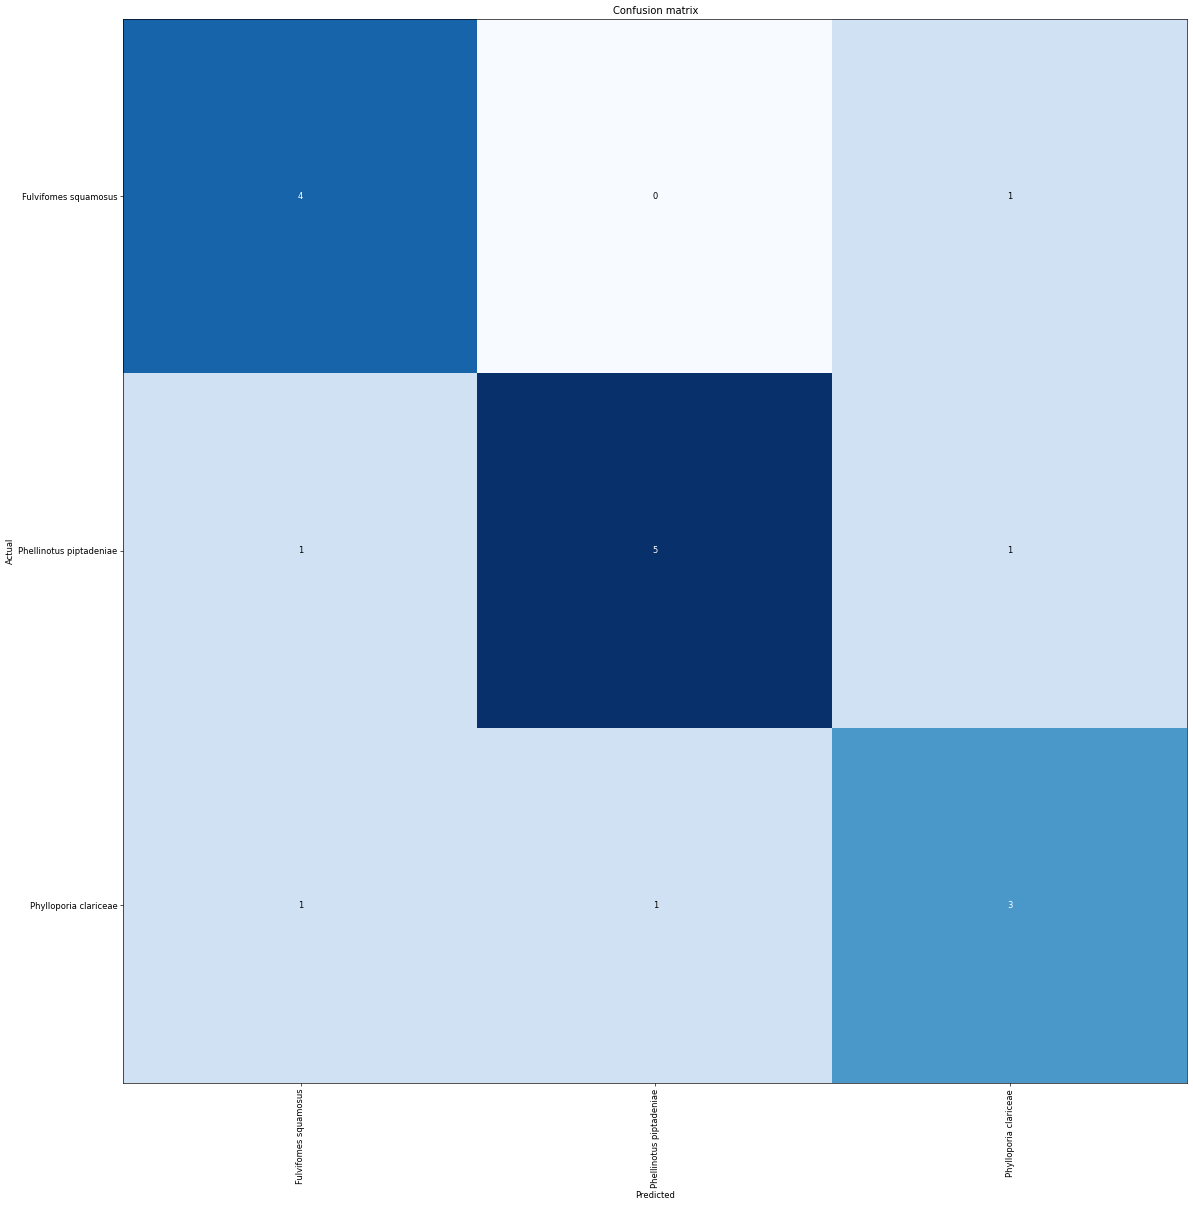

In [ ]:
learn.fit_one_cycle(15,callbacks=WandbCallback(learn, input_type='images'))
#learn.fit_one_cycle(15)
learn.save('Protax_Esporos1000x_Abril-resnet50_3cl')
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(20,20), dpi=60)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

Imprime na tela fotos dos piores casos e posteriormente com mapa de calor

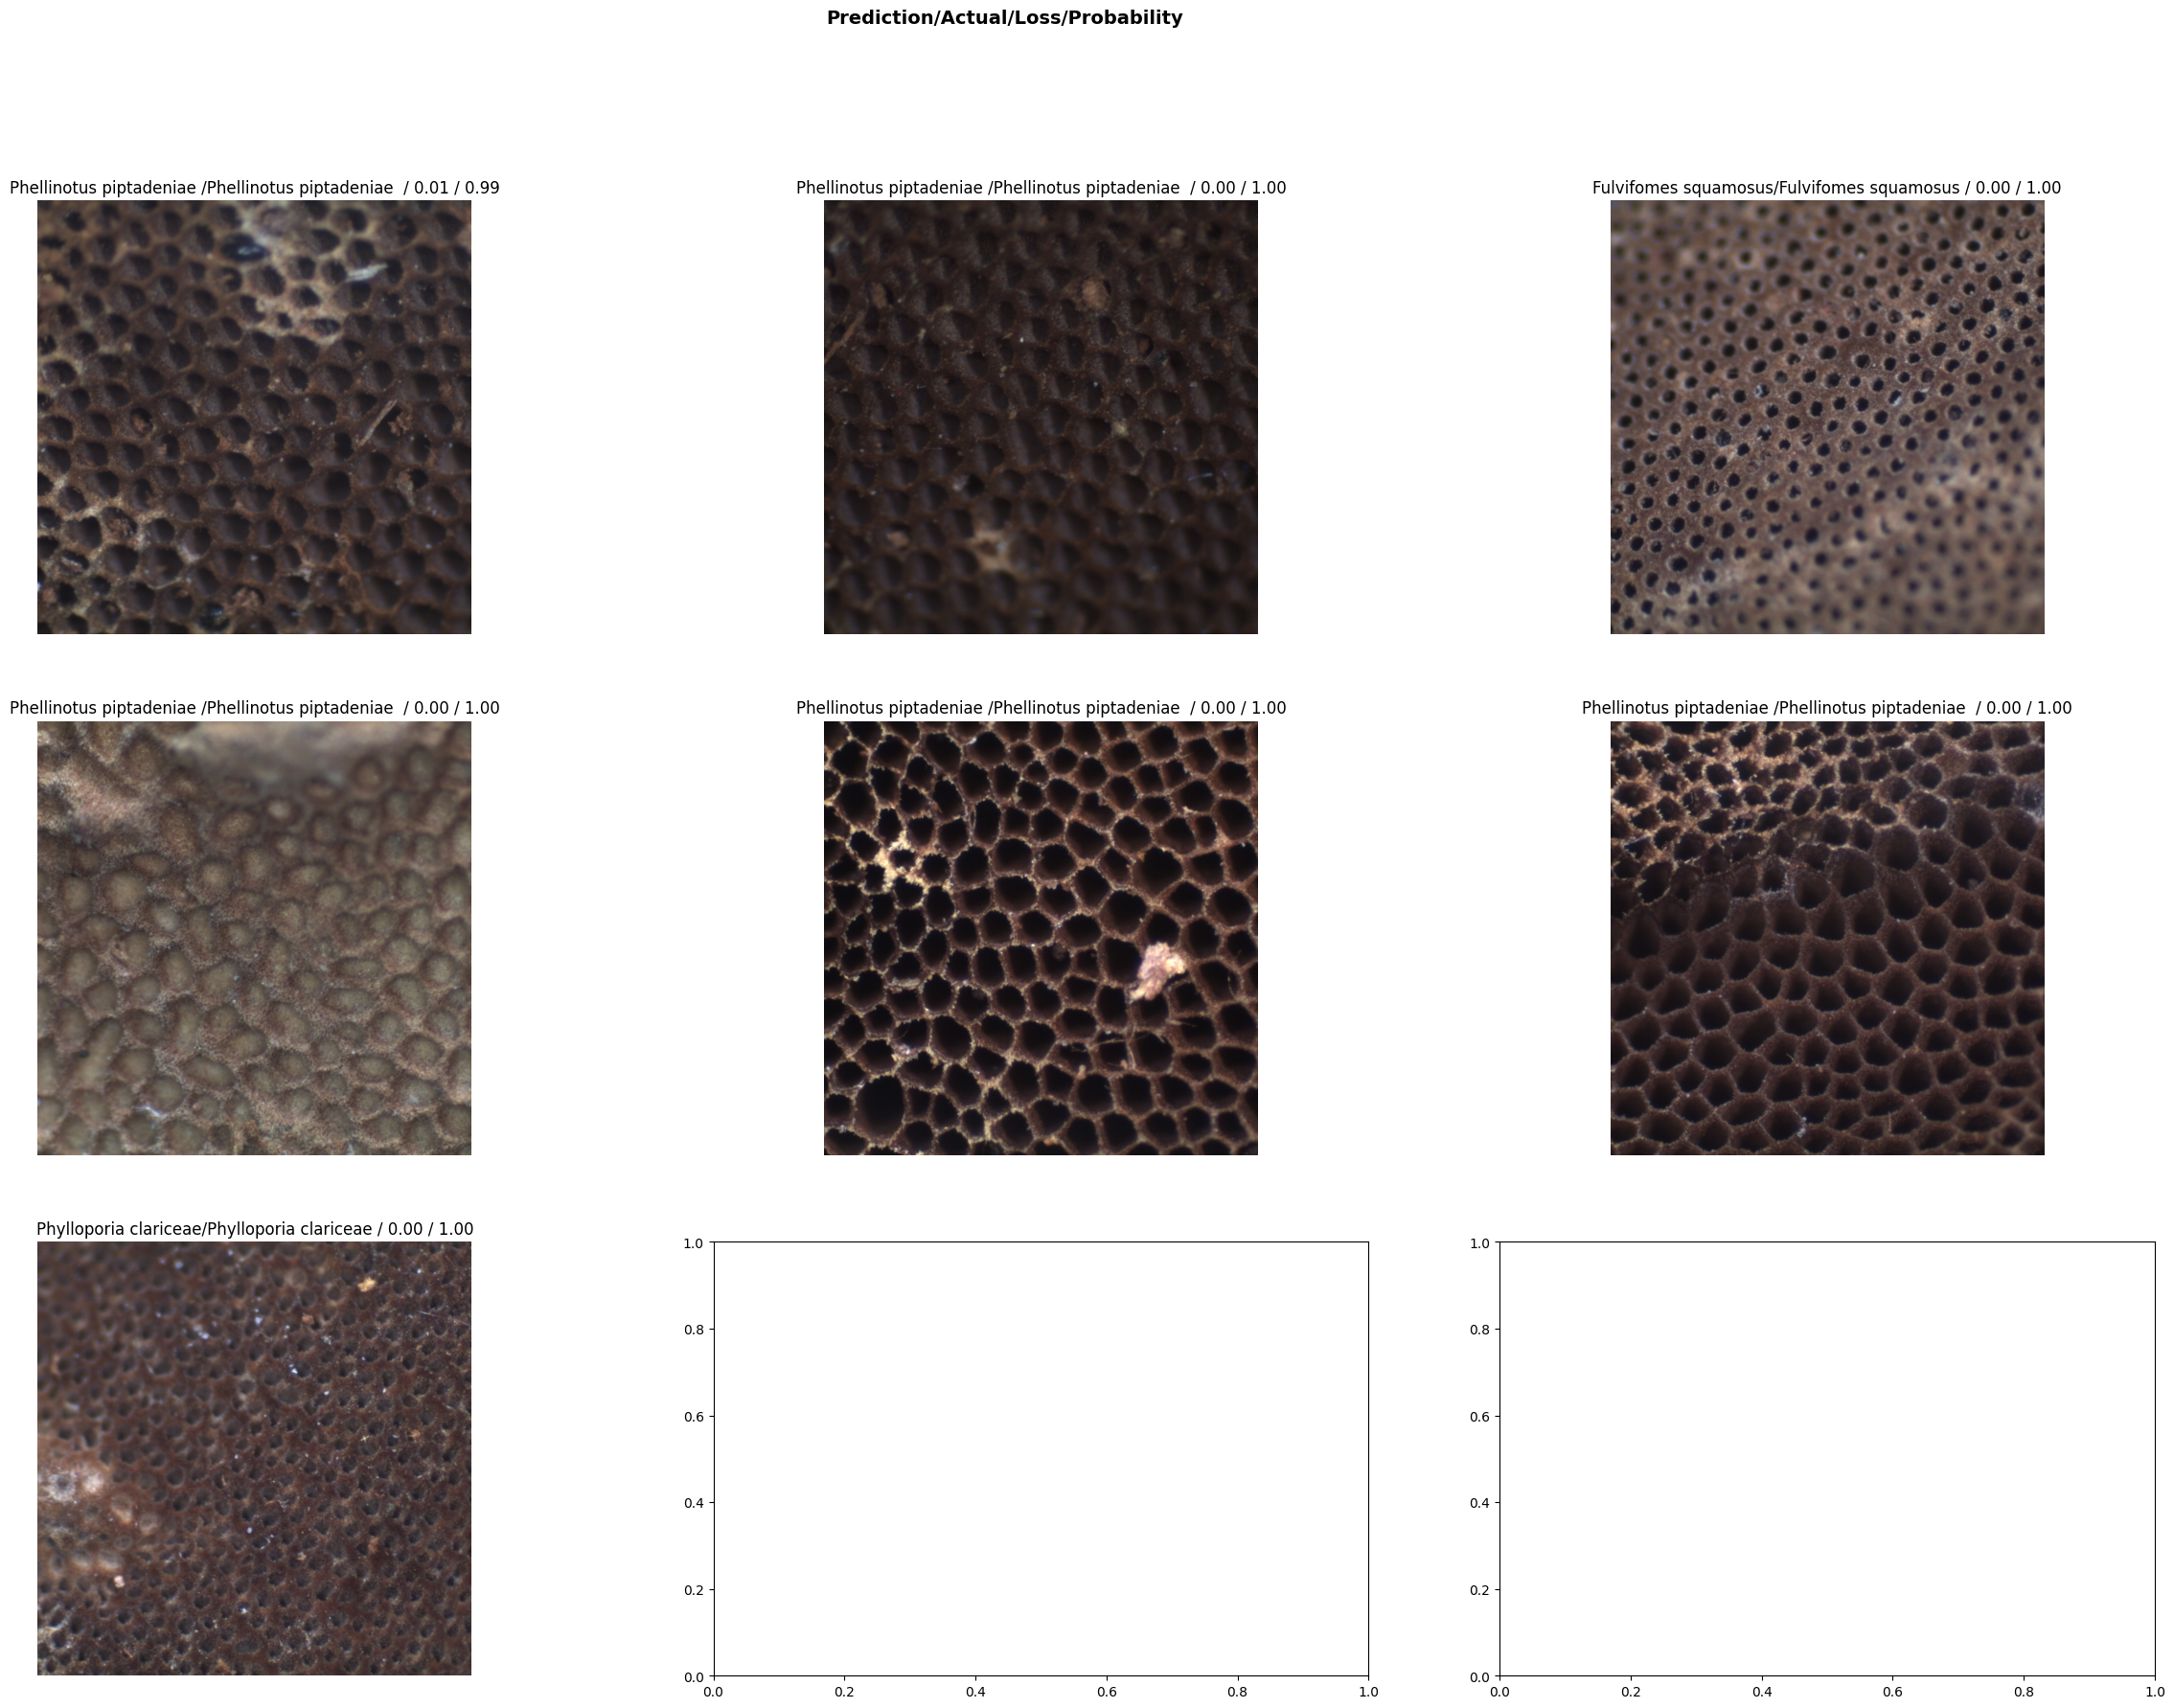

In [ ]:
interp.plot_top_losses(7, figsize=(30,20), heatmap=False)

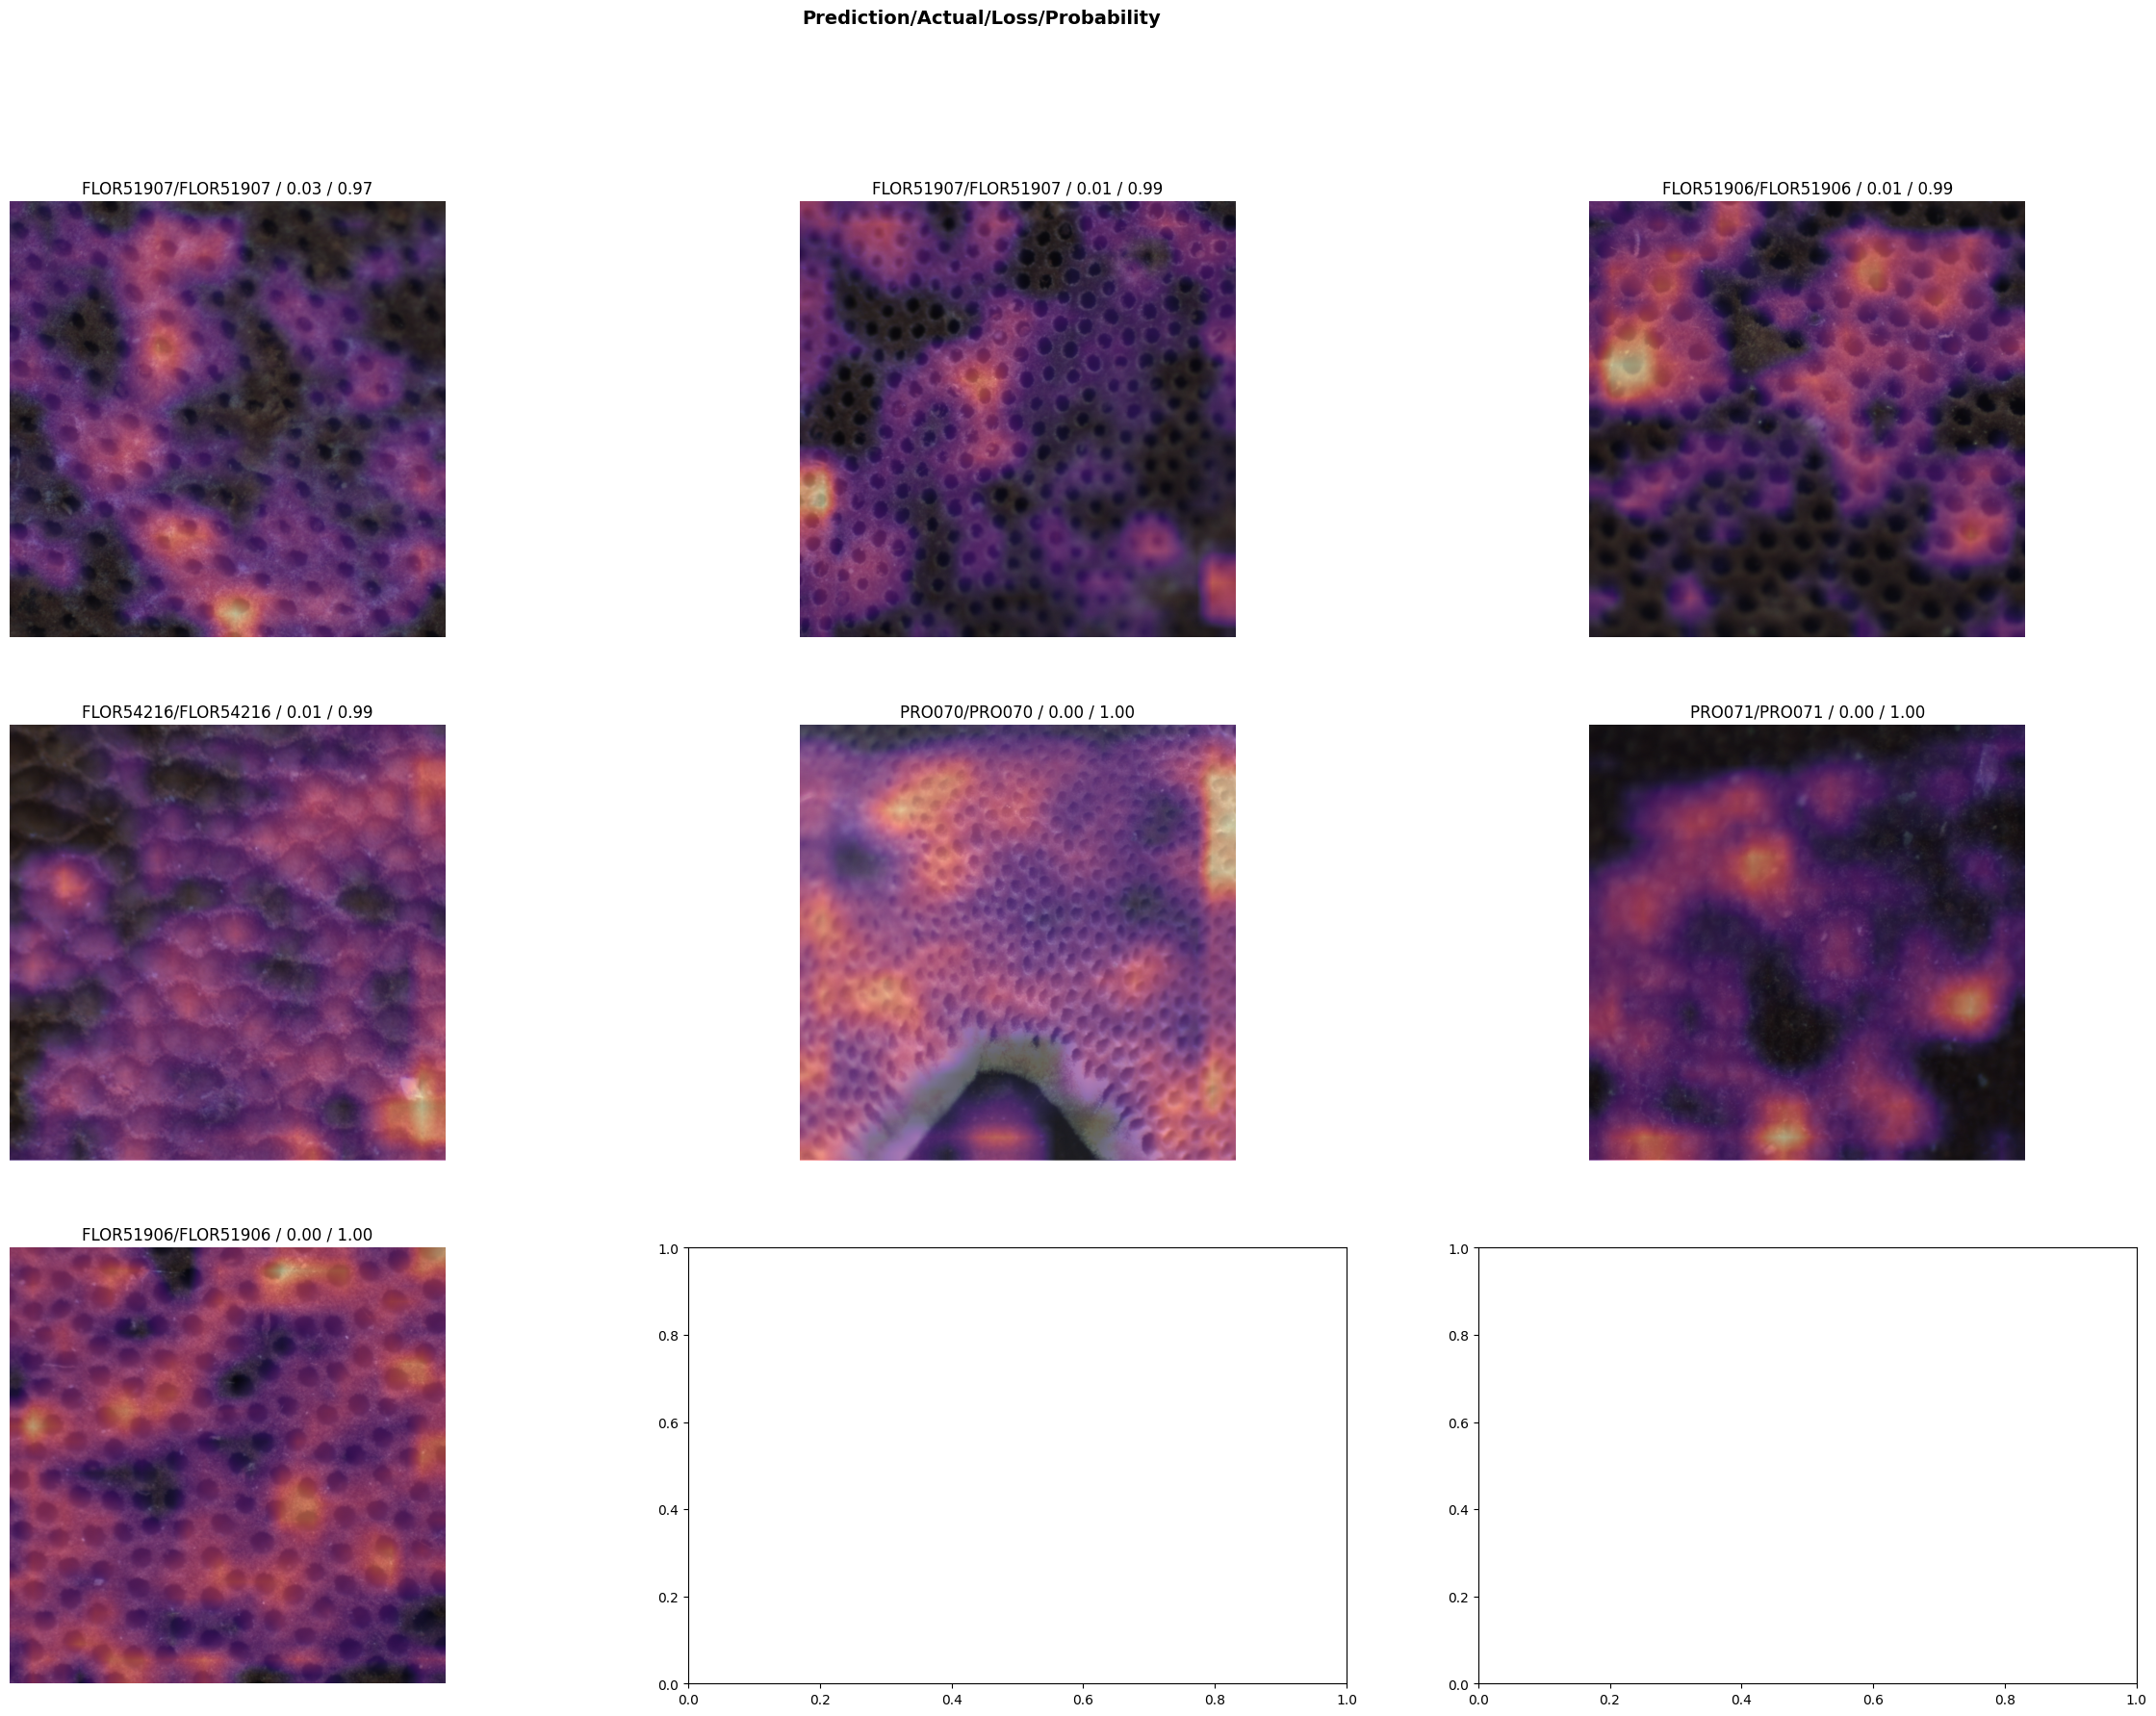

In [ ]:
interp.plot_top_losses(7, figsize=(30,20), heatmap=True)

Mostrando a matriz de confusão
- Os elementos da matriz principal são as classificações corretas

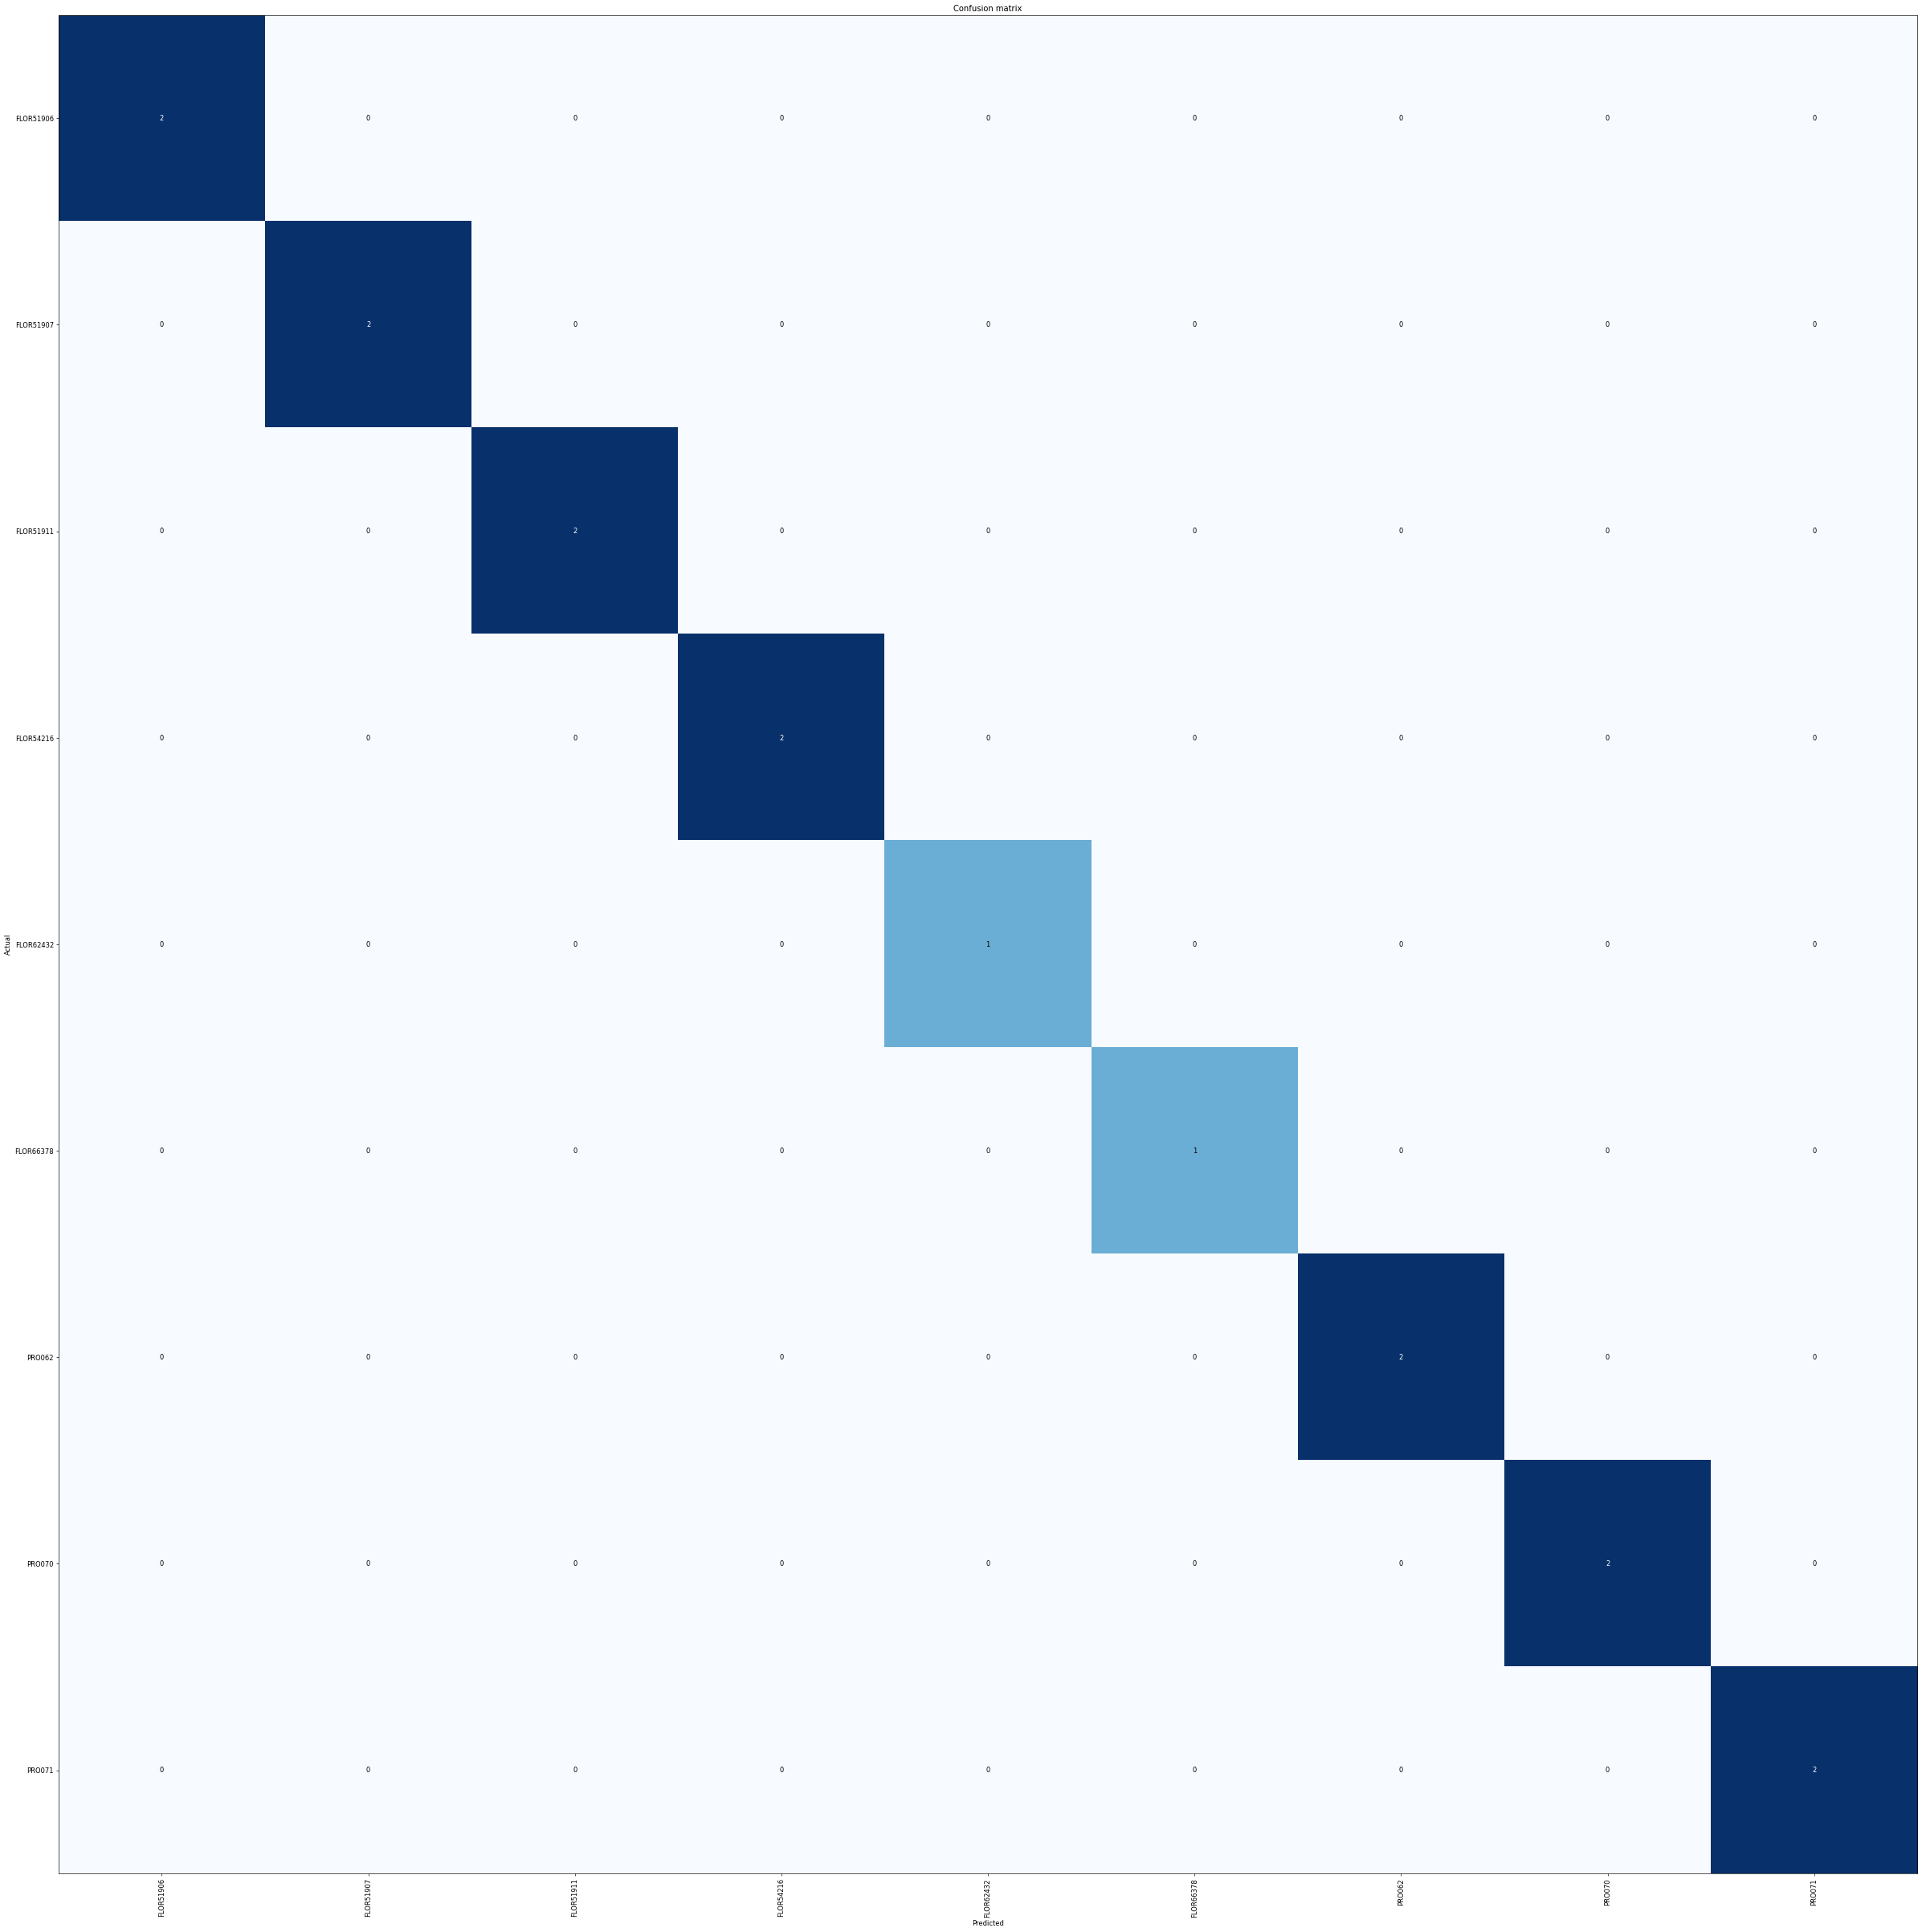

In [ ]:
interp.plot_confusion_matrix(figsize=(40,40), dpi=60)

Imprime na tela as especies mais confundidas e o seu erro

In [ ]:
interp.most_confused(min_val=2)

[]